In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_excel('cleaned_df.xlsx', header = 0)
df.head()

,score,label,is_correct_label,description
0,7.0,1,1,"Mình đặt ""Bánh đa trộn chả cá"", mình thấy ăn rất ngon, rất hợp khẩu vị của mình. Nhưng quán làm nước dùng hơi mặn, còn bánh đa quán cắt bé quá, phải dùng thìa mới ăn đc."
1,10.0,0,1,Bún ngon rất hợp lý giá tiền phục vụ rất tốt quán ăn sạch sẽ sẽ ủng hộ tiếp ạ
2,9.8,0,1,Bánh mì ở đây rất ngon. Vị béo ngậy của pate tan dần trong miệng thật tuyệt. Uống cùng với trà sữa matcha thì k gì bằng 😋😋😋 mình sẽ thường xuyên ủng hộ quán
3,9.6,0,1,"Mình order khoai dẻo truyền thống và ngũ sắc. Chè rất ngon, khoai dẻo mềm và thơm. Mình từng ăn khoai dẻo ở nhiều quán online khác nhưng rất dai và ko thơm như ở đây. Ngũ sắc vừa miệng, có trân châu dai dai, phô mai cũng rất thơm béo. Sẽ ủng hộ tiếp 😍"
4,9.0,1,1,Cơm gà khá ổn áp cơm ngon như ở nhà căm thịt gà chắc và dai ngọt thịt nước canh ăn kèm ngon nhưng ko có rau nhiều phục vụ khá ok


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5489 entries, 0 to 5488
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   score             5489 non-null   float64
 1   label             5489 non-null   int64  
 2   is_correct_label  5489 non-null   int64  
 3   description       5475 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 171.7+ KB


In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5475 entries, 0 to 5488
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   score             5475 non-null   float64
 1   label             5475 non-null   int64  
 2   is_correct_label  5475 non-null   int64  
 3   description       5475 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 213.9+ KB


In [7]:
from preprocess_text_sourcecode import *

In [8]:
df['description_token'] = ""

for index, row in df.iterrows():
    review = row['description']
    review = pre_processing(review)
    token = tokenize(review)
    df.at[index, 'description_token'] = token

In [9]:
df.head()

,score,label,is_correct_label,description,description_token
0,7.0,1,1,"Mình đặt ""Bánh đa trộn chả cá"", mình thấy ăn rất ngon, rất hợp khẩu vị của mình. Nhưng quán làm nước dùng hơi mặn, còn bánh đa quán cắt bé quá, phải dùng thìa mới ăn đc.",mình đặt bánh_đa trộn chả_cá mình thấy ăn rất ngon rất hợp khẩu_vị của mình nhưng quán làm nước dùng hơi mặn còn bánh_đa quán cắt bé quá phải dùng thìa mới ăn được tích_cực tích_cực
1,10.0,0,1,Bún ngon rất hợp lý giá tiền phục vụ rất tốt quán ăn sạch sẽ sẽ ủng hộ tiếp ạ,bún ngon rất hợp_lý giá tiền phục_vụ rất tốt quán ăn sạch_sẽ sẽ ủng_hộ tiếp ạ tích_cực tích_cực tích_cực tích_cực
2,9.8,0,1,Bánh mì ở đây rất ngon. Vị béo ngậy của pate tan dần trong miệng thật tuyệt. Uống cùng với trà sữa matcha thì k gì bằng 😋😋😋 mình sẽ thường xuyên ủng hộ quán,bánh_mì ở đây rất ngon vị béo_ngậy của pate tan dần trong miệng thật tuyệt uống cùng với trà sữa matcha thì không gì bằng tích_cực tích_cực tích_cực mình sẽ thường_xuyên ủng_hộ quán tích_cực tích_cực tích_cực tích_cực tích_cực
3,9.6,0,1,"Mình order khoai dẻo truyền thống và ngũ sắc. Chè rất ngon, khoai dẻo mềm và thơm. Mình từng ăn khoai dẻo ở nhiều quán online khác nhưng rất dai và ko thơm như ở đây. Ngũ sắc vừa miệng, có trân châu dai dai, phô mai cũng rất thơm béo. Sẽ ủng hộ tiếp 😍",mình đặt_hàng khoai dẻo truyền_thống và ngũ_sắc chè rất ngon khoai dẻo mềm và thơm mình từng ăn khoai dẻo ở nhiều quán online khác nhưng rất dai và không thơm như ở đây ngũ_sắc vừa_miệng có trân_châu dai dai phô mai cũng rất thơm béo sẽ ủng_hộ tiếp tích_cực tích_cực tích_cực tích_cực
4,9.0,1,1,Cơm gà khá ổn áp cơm ngon như ở nhà căm thịt gà chắc và dai ngọt thịt nước canh ăn kèm ngon nhưng ko có rau nhiều phục vụ khá ok,cơm gà khá ổn_áp cơm ngon như ở nhà căm thịt gà chắc và dai ngọt thịt nước_canh ăn kèm ngon nhưng không có rau nhiều phục_vụ khá ok tích_cực tích_cực tích_cực


In [10]:
correct_set = df[df['is_correct_label'] == 1]
unlabelled_set = df[df['is_correct_label'] == 0]

In [11]:
correct_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508 entries, 0 to 5488
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   score              508 non-null    float64
 1   label              508 non-null    int64  
 2   is_correct_label   508 non-null    int64  
 3   description        508 non-null    object 
 4   description_token  508 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 23.8+ KB


In [12]:
unlabelled_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4967 entries, 14 to 5483
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   score              4967 non-null   float64
 1   label              4967 non-null   int64  
 2   is_correct_label   4967 non-null   int64  
 3   description        4967 non-null   object 
 4   description_token  4967 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 232.8+ KB


## 1. Relabeling model

### 1a. Choose model

In [13]:
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import f1_score

In [14]:
# Parameters
sdg_params = dict(alpha=1e-5, penalty='l2', loss='log')
vectorizer_params = dict(ngram_range=(1, 2), min_df=5, max_df=0.8, lowercase= False)

# Supervised Pipeline
pipeline = Pipeline([
    ('vect', CountVectorizer(**vectorizer_params)),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(**sdg_params)),
])

# SelfTraining Pipeline
st_pipeline = Pipeline([
    ('vect', CountVectorizer(**vectorizer_params)),
    ('tfidf', TfidfTransformer()),
    ('clf', SelfTrainingClassifier(SGDClassifier(**sdg_params), threshold=0.9, verbose=True)),
])

# LabelSpreading Pipeline
ls_pipeline = Pipeline([
    ('vect', CountVectorizer(**vectorizer_params)),
    ('tfidf', TfidfTransformer()),
    # LabelSpreading does not support dense matrices
    ('todense', FunctionTransformer(lambda x: x.todense())),
    ('clf', LabelSpreading()),
])

def eval_and_print_metrics(clf, X_train, y_train, X_test, y_test):
    print("Number of training samples:", len(X_train))
    print("Unlabeled samples in training set:",
          sum(1 for x in y_train if x == -1))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Micro-averaged F1 score on test set: "
          "%0.6f" % f1_score(y_test, y_pred, average='micro'))
    print("-" * 10)
    print()


In [15]:
seed = correct_set.groupby('label').apply(lambda x: x.sample(100)).droplevel(0)
test = correct_set[~correct_set.index.isin(seed.index)]

In [16]:
X_seed = seed['description_token']
y_seed = seed['label']
X_test = test['description_token']
y_test = test['label']

# Try with Supervised SGDClassfier as benchmark
print("Supervised SGDClassifier on 5.5% of the data:")
eval_and_print_metrics(pipeline, X_seed, y_seed, X_test, y_test)

# Try with semi-supervised learning

    ## Prepare data
unlabelled_set.label = -1
train = pd.concat([unlabelled_set, seed])
X_train = train['description_token']
y_train = train['label']

    ## SelfTraining
print("SelfTrainingClassifier on 5.5% of the training data:")
eval_and_print_metrics(st_pipeline, X_train, y_train, X_test, y_test)

    ## LabelSpreading
print("LabelSpreading on 5.5% of the training data:")
eval_and_print_metrics(ls_pipeline, X_train, y_train, X_test, y_test)

Supervised SGDClassifier on 5.5% of the data:
Number of training samples: 300
Unlabeled samples in training set: 0
Micro-averaged F1 score on test set: 0.692308
----------

SelfTrainingClassifier on 5.5% of the training data:
Number of training samples: 5267
Unlabeled samples in training set: 4967


C:\Users\Jenny\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


End of iteration 1, added 1577 new labels.
End of iteration 2, added 961 new labels.
End of iteration 3, added 456 new labels.
End of iteration 4, added 281 new labels.
End of iteration 5, added 71 new labels.
End of iteration 6, added 79 new labels.
End of iteration 7, added 50 new labels.
End of iteration 8, added 25 new labels.
End of iteration 9, added 26 new labels.
End of iteration 10, added 17 new labels.
Micro-averaged F1 score on test set: 0.826923
----------

LabelSpreading on 5.5% of the training data:
Number of training samples: 5267
Unlabeled samples in training set: 4967


C:\Users\Jenny\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\Jenny\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Micro-averaged F1 score on test set: 0.283654
----------



<b><u>Conclusion</u></b>: Use Self Training model to propagate label for dataset

In [17]:
st = st_pipeline.fit(X_train, y_train)

End of iteration 1, added 1542 new labels.
End of iteration 2, added 960 new labels.
End of iteration 3, added 409 new labels.
End of iteration 4, added 227 new labels.
End of iteration 5, added 127 new labels.
End of iteration 6, added 75 new labels.
End of iteration 7, added 52 new labels.
End of iteration 8, added 20 new labels.
End of iteration 9, added 15 new labels.
End of iteration 10, added 21 new labels.


In [18]:
y_new = st.predict(unlabelled_set['description_token'])
unlabelled_set['label'] = y_new

2021-11-09 00:58:22,650 [3248] WARNING  py.warnings:109: [JupyterRequire] C:\Users\Jenny\AppData\Local\Temp/ipykernel_3248/2972561241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlabelled_set['label'] = y_new



In [20]:
unlabelled_set.drop(columns = ['score','is_correct_label']).to_excel('relabelled_dataset2.xlsx', index = False)

### 1b. Visualize data with new label

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

def create_word_vecs(array):
    vectorizer = TfidfVectorizer(max_features = 300,
                             max_df = 0.8,
                             encoding='utf-8', 
                             lowercase = False)

    vecs = vectorizer.fit_transform(array)
    feature_names = vectorizer.get_feature_names()
    dense = vecs.todense()
    lst1 = dense.tolist()
    word_freqs = pd.DataFrame(lst1, columns=feature_names)
    return word_freqs.T.sum(axis=1)

In [24]:
df_total = pd.concat([correct_set, unlabelled_set])
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5475 entries, 0 to 5483
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   score              5475 non-null   float64
 1   label              5475 non-null   int64  
 2   is_correct_label   5475 non-null   int64  
 3   description        5475 non-null   object 
 4   description_token  5475 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 256.6+ KB


In [25]:
pos = df_total[df_total['label'] == 0]
neu = df_total[df_total['label'] == 1]
neg = df_total[df_total['label'] == 2]

pos_vec = create_word_vecs(pos['description_token'])
neu_vec = create_word_vecs(neu['description_token'])
neg_vec = create_word_vecs(neg['description_token'])

2021-11-09 01:00:39,888 [3248] WARNING  py.warnings:109: [JupyterRequire] C:\Users\Jenny\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



In [26]:
print('Number of positive reviews:', len(pos))
print('Number of neutral reviews:', len(neu))
print('Number of negative reviews:', len(neg))

Number of positive reviews: 3410
Number of neutral reviews: 1802
Number of negative reviews: 263


#### Positive:

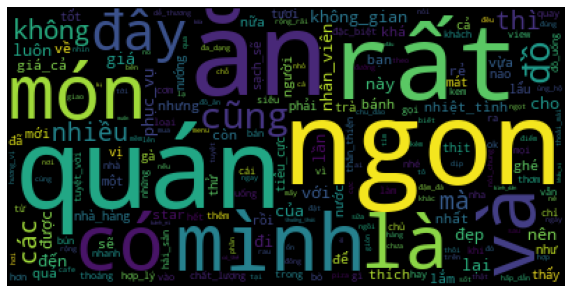

In [27]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud().generate_from_frequencies(pos_vec)
plt.figure(figsize = (10,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

#### Neutral:

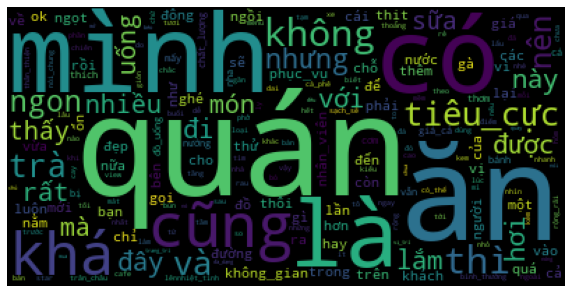

In [28]:
from wordcloud import WordCloud

wc = WordCloud().generate_from_frequencies(neu_vec)
plt.figure(figsize = (10,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

#### Negative:

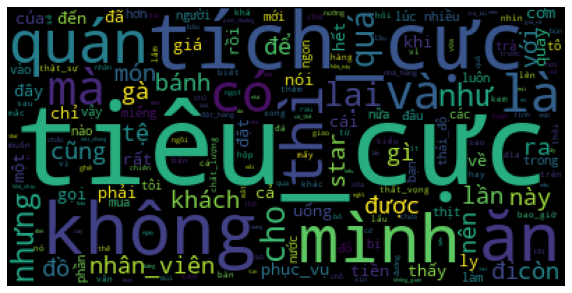

In [29]:
from wordcloud import WordCloud

wc = WordCloud().generate_from_frequencies(neg_vec)
plt.figure(figsize = (10,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

## 2. Classification model

### 2a. Choose model

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df_total['description_token'], df_total['label'], test_size = 0.3)

In [32]:
y_train.value_counts()

0    2399
1    1238
2     195
Name: label, dtype: int64

In [33]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [34]:
# Try without re-sampling

models = [
         LogisticRegression(),
         DecisionTreeClassifier(),
         RandomForestClassifier(),
         KNeighborsClassifier(),
         SVC()
]

for model in models: 
    model_name = model.__class__.__name__
    pipe = Pipeline([
        ('vect', CountVectorizer(**vectorizer_params)),
        ('tfidf', TfidfTransformer()),
        ('classifier', model)
    ])
    clf = pipe.fit(X_train, y_train)
    yhat = clf.predict(X_test)
    print('Model:', model_name)
    print('Confusion matrix: \n', confusion_matrix(y_test, yhat))
    print('Classification report: \n', classification_report(y_test, yhat))

Model: LogisticRegression
Confusion matrix: 
 [[993  17   1]
 [ 74 489   1]
 [ 23  18  27]]
Classification report: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      1011
           1       0.93      0.87      0.90       564
           2       0.93      0.40      0.56        68

    accuracy                           0.92      1643
   macro avg       0.93      0.75      0.80      1643
weighted avg       0.92      0.92      0.91      1643

Model: DecisionTreeClassifier
Confusion matrix: 
 [[855 142  14]
 [161 380  23]
 [ 15  22  31]]
Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1011
           1       0.70      0.67      0.69       564
           2       0.46      0.46      0.46        68

    accuracy                           0.77      1643
   macro avg       0.66      0.66      0.66      1643
weighted avg       0.77      0.77      0.77      1643



2021-11-09 01:00:52,702 [3248] WARNING  py.warnings:109: [JupyterRequire] C:\Users\Jenny\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

2021-11-09 01:00:52,707 [3248] WARNING  py.warnings:109: [JupyterRequire] C:\Users\Jenny\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

2021-11-09 01:00:52,711 [3248] WARNING  py.warnings:109: [JupyterRequire] C:\Users\Jenny\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\

Model: KNeighborsClassifier
Confusion matrix: 
 [[1011    0    0]
 [ 564    0    0]
 [  68    0    0]]
Classification report: 
               precision    recall  f1-score   support

           0       0.62      1.00      0.76      1011
           1       0.00      0.00      0.00       564
           2       0.00      0.00      0.00        68

    accuracy                           0.62      1643
   macro avg       0.21      0.33      0.25      1643
weighted avg       0.38      0.62      0.47      1643

Model: SVC
Confusion matrix: 
 [[989  21   1]
 [ 76 487   1]
 [ 23  22  23]]
Classification report: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1011
           1       0.92      0.86      0.89       564
           2       0.92      0.34      0.49        68

    accuracy                           0.91      1643
   macro avg       0.92      0.73      0.78      1643
weighted avg       0.91      0.91      0.91      1643



In [35]:
# Try with resampling

models = [
         LogisticRegression(),
         DecisionTreeClassifier(),
         RandomForestClassifier(),
         KNeighborsClassifier(),
         SVC()
]

for model in models: 
    model_name = model.__class__.__name__
    
    #steps
    vect = CountVectorizer(**vectorizer_params)
    tfidf = TfidfTransformer()
    smote = SMOTE()
    classifier = model
    
    pipe = make_pipeline(vect, tfidf, smote, classifier)
    clf = pipe.fit(X_train, y_train)
    yhat = clf.predict(X_test)
    print('Model:', model_name)
    print('Confusion matrix: \n', confusion_matrix(y_test, yhat))
    print('Classification report: \n', classification_report(y_test, yhat))

Model: LogisticRegression
Confusion matrix: 
 [[959  45   7]
 [ 34 521   9]
 [  5   6  57]]
Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      1011
           1       0.91      0.92      0.92       564
           2       0.78      0.84      0.81        68

    accuracy                           0.94      1643
   macro avg       0.88      0.90      0.89      1643
weighted avg       0.94      0.94      0.94      1643

Model: DecisionTreeClassifier
Confusion matrix: 
 [[848 129  34]
 [140 392  32]
 [ 15  20  33]]
Classification report: 
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      1011
           1       0.72      0.70      0.71       564
           2       0.33      0.49      0.40        68

    accuracy                           0.77      1643
   macro avg       0.63      0.67      0.65      1643
weighted avg       0.78      0.77      0.78      1643



### 2b. Optimize Logistic Regression model

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
logit_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}

In [38]:
from datetime import datetime, timedelta
start_time  = datetime.now()

# steps
vect = CountVectorizer(**vectorizer_params)
tfidf = TfidfTransformer()
smote = SMOTE()
logit_gs = GridSearchCV(LogisticRegression(max_iter = 1000),
                       param_grid = logit_param_grid,
                       cv = 5,
                       scoring = 'f1_micro')


lg_pipe = make_pipeline(vect, tfidf, smote, logit_gs)
lg_pipe.fit(X_train, y_train)

end_time = datetime.now()
dt = end_time - start_time
print('Run time:', dt)

2021-11-09 01:05:45,227 [3248] WARNING  py.warnings:109: [JupyterRequire] C:\Users\Jenny\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



Run time: 0:05:49.447408


In [39]:
yhat = lg_pipe.predict(X_test)
print('Confusion matrix: \n', confusion_matrix(y_test, yhat))
print('Classification report: \n', classification_report(y_test, yhat))

Confusion matrix: 
 [[971  37   3]
 [ 40 518   6]
 [  6   6  56]]
Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      1011
           1       0.92      0.92      0.92       564
           2       0.86      0.82      0.84        68

    accuracy                           0.94      1643
   macro avg       0.91      0.90      0.91      1643
weighted avg       0.94      0.94      0.94      1643



In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

matrix_df = pd.DataFrame(confusion_matrix(y_test, yhat),
                         index=['positive','neutral','negative'],
                         columns=['positive','neutral','negative'])
matrix_df

,positive,neutral,negative
positive,971,37,3
neutral,40,518,6
negative,6,6,56


Text(0.5, 1.0, 'Predict')

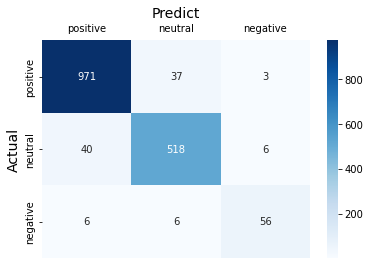

In [41]:
sns.heatmap(matrix_df,annot=True,cmap='Blues',fmt='g')
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.ylabel("Actual", fontsize = 14)
plt.title("Predict", fontsize = 14)

In [42]:
print('Accuracy on train set:', accuracy_score(y_train, lg_pipe.predict(X_train)))
print('Accuracy on test set:', accuracy_score(y_test, yhat))

Accuracy on train set: 1.0
Accuracy on test set: 0.9403530127814973


In [50]:
from joblib import dump, load
dump(lg_pipe, 'LogisticRegressionModel2.joblib')

['LogisticRegressionModel2.joblib']